In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8
import pandas as pd

In [2]:
with open("results/batch_train_acc_lstm.pkl", "rb") as f:
    train_acc_lstm = pickle.load(f)

with open("results/batch_dev_acc_lstm.pkl", "rb") as f:
    dev_acc_lstm = pickle.load(f)

with open("inputs_train.pkl", "rb") as f:
   inputs_train = pickle.load(f)

with open("inputs_val.pkl", "rb") as f:
   inputs_dev = pickle.load(f)

In [3]:
print(inputs_dev)

{'input_ids': tensor([[  101,  2009,  1005,  ...,  1037,  2735,   102],
        [  101,  2619,  2734,  ...,     0,     0,     0],
        [  101,  1996, 11594,  ...,     0,     0,     0],
        ...,
        [  101,  2017,  2064,  ...,     0,     0,     0],
        [  101, 11865,  5753,  ..., 18795,  2006,   102],
        [  101,  1000,  1996,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([0., 0., 0.,  ..., 1., 1., 1.])}


In [4]:
steps_per_epoch_train = 50000 // 64 #numero di esempi / batch size
steps_per_epoch_val = 5000 // 64

In [5]:
epoch_train_acc = []
for i in range(20):
    epoch_train_acc.append(np.mean(train_acc_lstm[(i*64): (i+1)* 64]))

Text(0.5, 1.0, 'Training Accuracy')

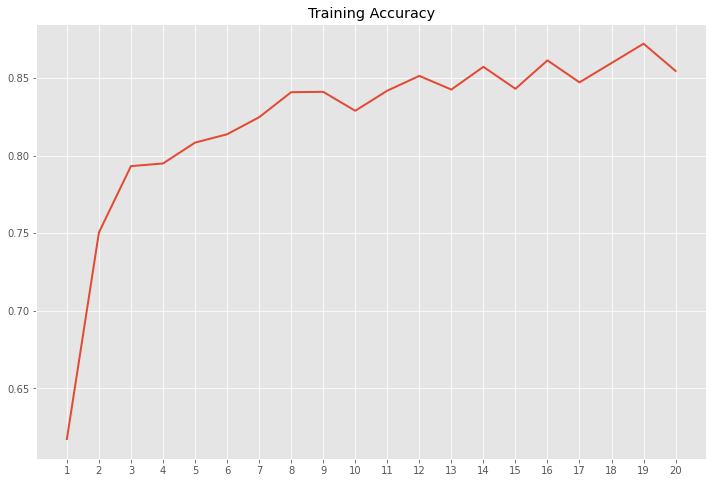

In [6]:
plt.plot(epoch_train_acc, lw = 2)
plt.xticks(ticks= np.arange(20), labels= np.arange(1,21,1))
plt.title('Training Accuracy')

In [7]:
epoch_dev_acc = []
for i in range(20):
    epoch_dev_acc.append(np.mean(dev_acc_lstm[(i*steps_per_epoch_val): (i+1)* steps_per_epoch_val]))

Text(0.5, 1.0, 'Validation Accuracy')

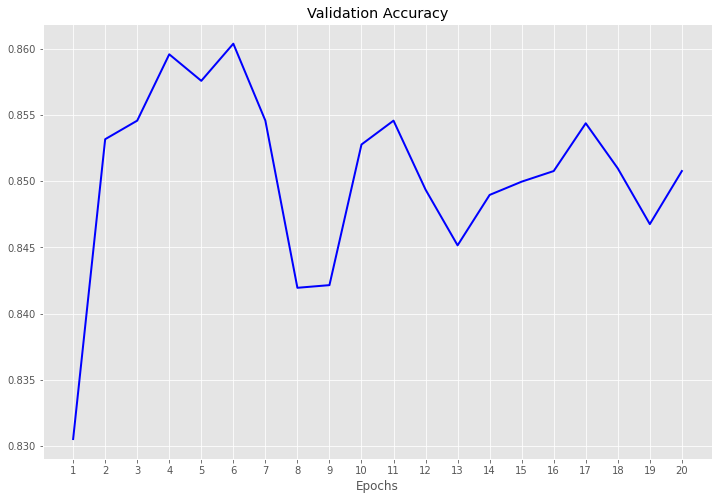

In [8]:
plt.plot(epoch_dev_acc, color = 'blue', lw=2)
plt.xticks(ticks= np.arange(20), labels= np.arange(1,21,1))
plt.xlabel('Epochs')
plt.title('Validation Accuracy')

# BERT

In [9]:
with open("results/batch_train_acc_bert.pkl", "rb") as f:
    train_acc_bert = pickle.load(f)

with open("results/batch_dev_acc_bert.pkl", "rb") as f:
    dev_acc_bert = pickle.load(f)

In [10]:
epoch_dev_acc_bert = []
for i in range(10):
    epoch_dev_acc_bert.append(np.mean(dev_acc_bert[(i*steps_per_epoch_val): (i+1)* steps_per_epoch_val]))

Text(0.5, 1.0, 'Validation Accuracy')

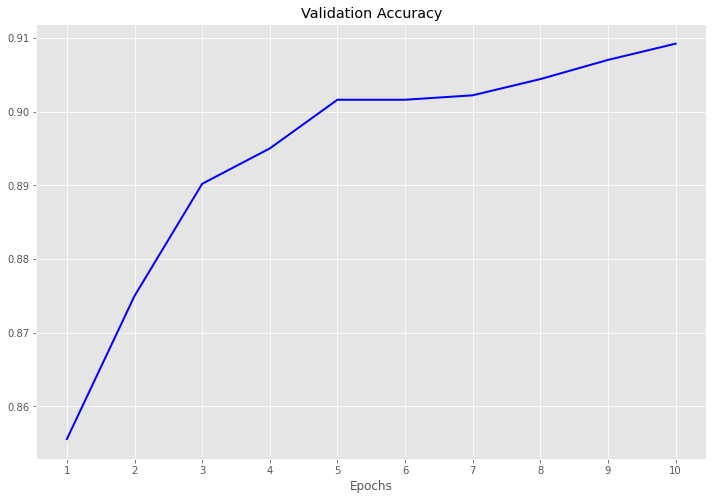

In [11]:
plt.plot(epoch_dev_acc_bert, color = 'blue', lw= 2)
plt.xticks(ticks= np.arange(10), labels= np.arange(1,11,1))
plt.xlabel('Epochs')
plt.title('Validation Accuracy')